In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os

data_path = "/content/drive/MyDrive/Deep_Learning"
print(os.listdir(data_path))
print(os.listdir(os.path.join(data_path, "Training")))


['Testing', 'Training']
['pituitary_tumor', 'glioma_tumor', 'meningioma_tumor', 'no_tumor']


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [ ]:
train_dir = "/content/drive/MyDrive/Deep_Learning/Training"
test_dir = "/content/drive/MyDrive/Deep_Learning/Testing"

train_data = datasets.ImageFolder(train_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

print("Training classes:", train_data.classes)
print("Number of training images:", len(train_data))
print("Number of testing images:", len(test_data))


Training classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Number of training images: 2870
Number of testing images: 394


In [ ]:
class BrainTumorCNN(nn.Module):
    def __init__(self):
        super(BrainTumorCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 4)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = self.dropout(nn.ReLU()(self.fc1(x)))
        x = self.fc2(x)
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = BrainTumorCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Using device: cpu


In [ ]:
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

num_epochs = 10
train_loss = []
train_acc = []

for epoch in range(num_epochs):
    start_time = time.time()  # start timer for this epoch

    running_loss = 0.0
    correct = 0
    total = 0

    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print mini-progress every 10 batches
        if (i+1) % 10 == 0:
            print(f"Epoch {epoch+1}, Batch {i+1}/{len(train_loader)} processed")

    # Calculate epoch stats
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)

    end_time = time.time()  # end timer
    epoch_time = (end_time - start_time) / 60  # in minutes

    print(f"\n⏱️ Epoch [{epoch+1}/{num_epochs}] completed.")
    print(f"   ➤ Loss: {epoch_loss:.4f}")
    print(f"   ➤ Accuracy: {epoch_acc:.2f}%")
    print(f"   ➤ Time taken: {epoch_time:.2f} minutes\n")

print("✅ Training completed successfully!")


Using device: cpu
Epoch 1, Batch 10/90 processed
Epoch 1, Batch 20/90 processed
Epoch 1, Batch 30/90 processed
Epoch 1, Batch 40/90 processed
Epoch 1, Batch 50/90 processed
Epoch 1, Batch 60/90 processed
Epoch 1, Batch 70/90 processed
Epoch 1, Batch 80/90 processed
Epoch 1, Batch 90/90 processed

⏱️ Epoch [1/10] completed.
   ➤ Loss: 0.3210
   ➤ Accuracy: 87.91%
   ➤ Time taken: 8.05 minutes

Epoch 2, Batch 10/90 processed
Epoch 2, Batch 20/90 processed
Epoch 2, Batch 30/90 processed
Epoch 2, Batch 40/90 processed
Epoch 2, Batch 50/90 processed
Epoch 2, Batch 60/90 processed
Epoch 2, Batch 70/90 processed
Epoch 2, Batch 80/90 processed
Epoch 2, Batch 90/90 processed

⏱️ Epoch [2/10] completed.
   ➤ Loss: 0.1926
   ➤ Accuracy: 93.48%
   ➤ Time taken: 8.08 minutes

Epoch 3, Batch 10/90 processed
Epoch 3, Batch 20/90 processed
Epoch 3, Batch 30/90 processed
Epoch 3, Batch 40/90 processed
Epoch 3, Batch 50/90 processed
Epoch 3, Batch 60/90 processed
Epoch 3, Batch 70/90 processed
Epoch 3, 

KeyboardInterrupt: 

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/brain_tumor_cnn_model_best.pth")
print("✅ Model saved successfully after 7 epochs!")


✅ Model saved successfully after 6 epochs!


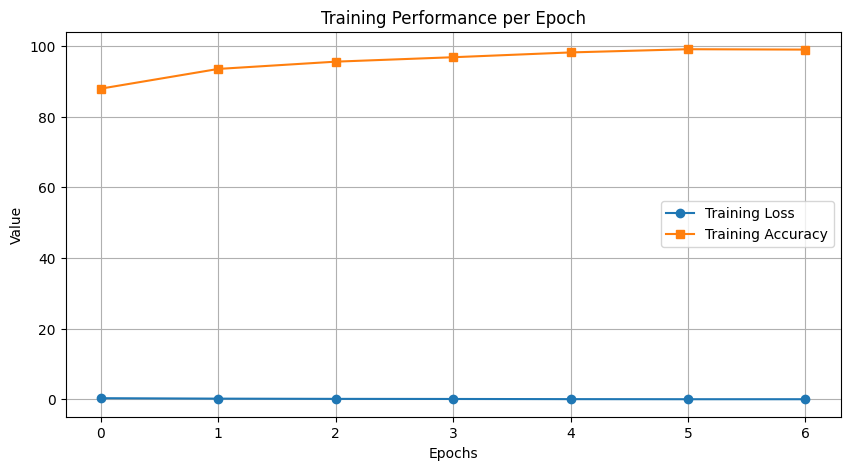

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train_loss, label='Training Loss', marker='o')
plt.plot(train_acc, label='Training Accuracy', marker='s')
plt.title('Training Performance per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


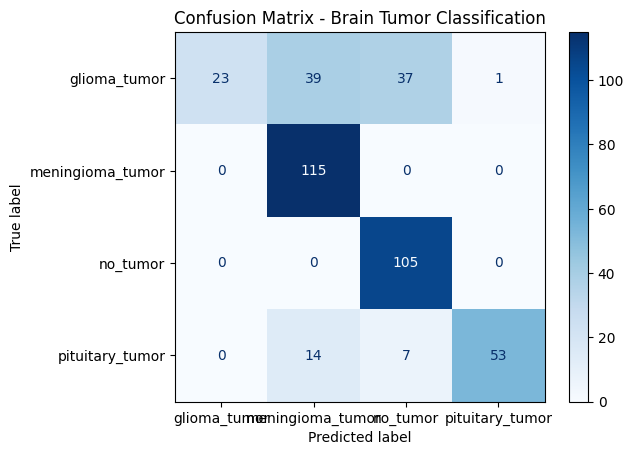

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_data.classes)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Brain Tumor Classification")
plt.show()


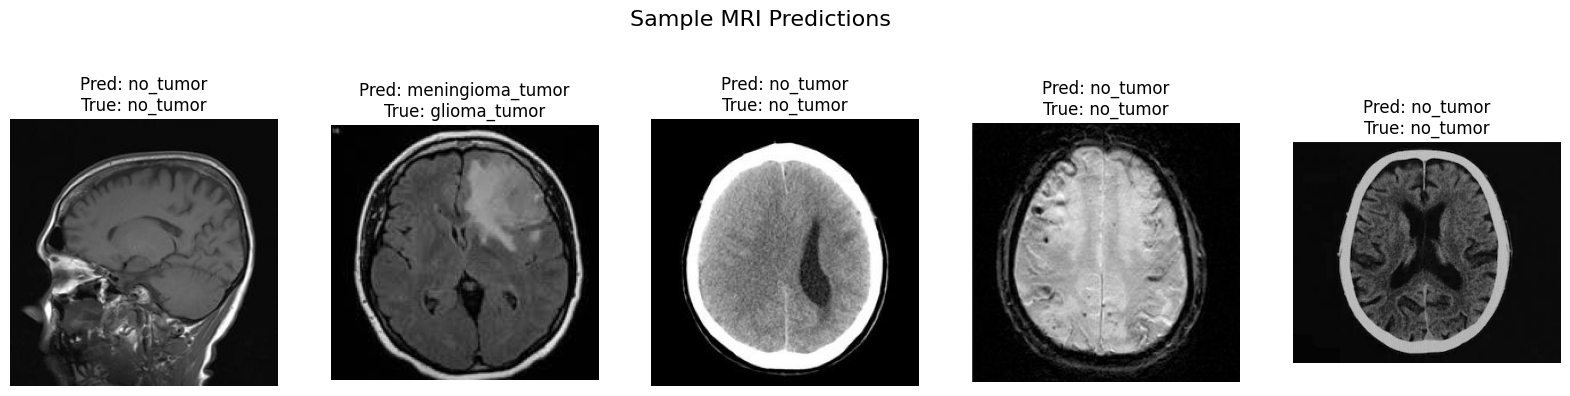

In [ ]:
import random
from PIL import Image

model.eval()
classes = train_data.classes

# Pick random 5 test images
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for ax in axes:
    idx = random.randint(0, len(test_data) - 1)
    img_path, label = test_data.samples[idx]
    image = Image.open(img_path)
    input_img = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_img)
        _, pred = torch.max(output, 1)

    ax.imshow(image)
    ax.set_title(f"Pred: {classes[pred.item()]}\nTrue: {classes[label]}")
    ax.axis("off")

plt.suptitle("Sample MRI Predictions", fontsize=16)
plt.show()


In [19]:
print(model)

BrainTumorCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=4, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [20]:
import torch
x = torch.load("/content/drive/MyDrive/brain_tumor_cnn_model_best.pth")
print(type(x))


<class 'collections.OrderedDict'>
